## **TÌM HIỂU VỀ CÁC BƯỚC CỦA THUẬT TOÁN CANNY:**


*trả lời câu hỏi theo yêu cầu đề bài ở trong Lab3\assets\images\bai_tap.png*

# Thuật toán phát hiện biên Canny (Canny Edge Detection)

Thuật toán Canny (John F. Canny, 1986) là một trong những thuật toán phát hiện biên hiệu quả nhất trong xử lý ảnh.  
Thuật toán này thỏa mãn ba tiêu chí quan trọng:
- Phát hiện đúng biên (Good detection)
- Định vị biên chính xác (Good localization)
- Mỗi biên chỉ được phát hiện một lần (Minimal response)

## a. Các bước của thuật toán Canny

### 1. Giảm nhiễu (Noise Reduction)

**Mục đích:**
- Loại bỏ nhiễu trong ảnh vì nhiễu có thể tạo ra các biên giả.

**Phương pháp:**
- Làm trơn ảnh bằng bộ lọc Gaussian:

$$G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

Trong đó:
- \( \sigma \) là độ lệch chuẩn, quyết định mức độ làm mờ của ảnh.

**Kết quả:**
- Ảnh sau khi lọc ít nhiễu và mượt hơn.


### 2. Tính toán Gradient (Gradient Calculation)

**Mục đích:**
- Xác định sự thay đổi cường độ sáng tại mỗi điểm ảnh để tìm biên.

**Phương pháp:**
- Tính đạo hàm theo hai hướng \(x\) và \(y\) (thường dùng toán tử Sobel):

$$G_x, G_y$$

- Độ lớn gradient:

$$G = \sqrt{G_x^2 + G_y^2}$$

- Hướng gradient:

$$\theta = \tan^{-1} \left( \frac{G_y}{G_x} \right)$$

**Kết quả:**
- Thu được ảnh biểu diễn độ mạnh và hướng của biên.


### 3. Non-Maximum Suppression (Ức chế không cực đại)

**Mục đích:**
- Làm mỏng biên, chỉ giữ lại các điểm ảnh là cực đại cục bộ.

**Phương pháp:**
- So sánh giá trị gradient của mỗi điểm với hai điểm lân cận theo hướng gradient.
- Chỉ giữ lại điểm có giá trị lớn nhất, các điểm khác bị loại bỏ.

**Kết quả:**
- Đường biên mảnh và rõ ràng hơn.


### 4. Ngưỡng kép (Double Thresholding)

**Mục đích:**
- Phân loại các điểm ảnh thành biên mạnh, biên yếu và không phải biên.

**Phương pháp:**
- Sử dụng hai ngưỡng:
  - Ngưỡng cao (High Threshold)
  - Ngưỡng thấp (Low Threshold)

Phân loại:
- Gradient ≥ ngưỡng cao → Biên mạnh
- Ngưỡng thấp ≤ Gradient < ngưỡng cao → Biên yếu
- Gradient < ngưỡng thấp → Loại bỏ


### 5. Theo dõi biên bằng Hysteresis (Edge Tracking)

**Mục đích:**
- Loại bỏ biên yếu không cần thiết.

**Phương pháp:**
- Biên yếu chỉ được giữ lại nếu nó kết nối với một biên mạnh.
- Biên yếu không kết nối với biên mạnh sẽ bị loại bỏ.

**Kết quả:**
- Thu được các đường biên liên tục và chính xác.

# b - So sánh với các thuật toán khác như Sobel, Laplacian.


## 1. Canny Edge Detection

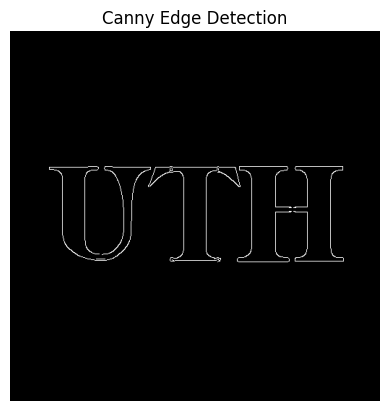

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"D:\anh_mau.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Không đọc được ảnh. Kiểm tra lại đường dẫn!")

canny = cv2.Canny(img, 100, 200)

plt.imshow(canny, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


## 2. Sobel Edge Detection

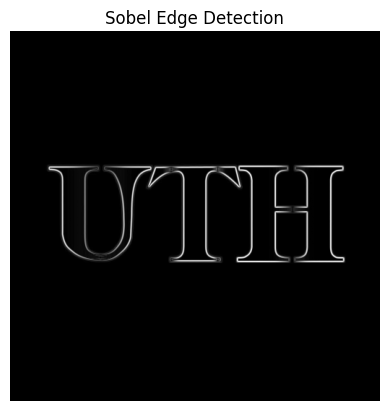

In [2]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh xám
img = cv2.imread(r"D:\anh_mau.jpg", cv2.IMREAD_GRAYSCALE)

# Sobel theo trục x và y
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Độ lớn gradient
sobel = cv2.magnitude(sobel_x, sobel_y)

# Hiển thị
plt.imshow(sobel, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()


## 3. Laplacian Edge Detection

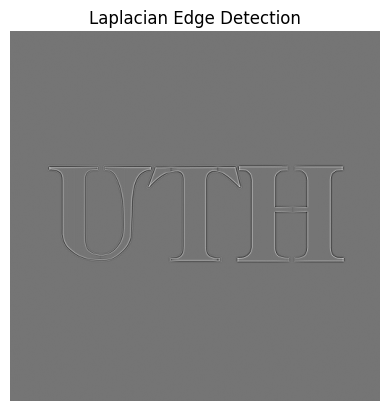

In [3]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh xám
img = cv2.imread(r"D:\anh_mau.jpg", cv2.IMREAD_GRAYSCALE)

# Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Hiển thị
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian Edge Detection")
plt.axis("off")
plt.show()


### Nhận xét

- **Canny**: Độ chính xác cao, ít nhiễu, phù hợp cho các hệ thống yêu cầu chất lượng cao.
- **Sobel**: Đơn giản, dễ cài đặt, phù hợp cho các bài toán cơ bản.
- **Laplacian**: Nhạy với nhiễu, thường được kết hợp với Gaussian (LoG).